# Laboratorium 5

## Zadania 1-5

#### Analiza wyników funkcji mnożenia macierzy kwadratowych w języku C

In [13]:
#library("ggplot2")
#library("ggpubr")
#library("lawstat")
#library("dplyr")
#library("rstatix")
#library("multcomp")
#library("sjmisc")
#library("GGally")
#library("emmeans")
#library("ggcorrplot")
#library("modeest")
#library("e1071")
#library("moments")
#library("psych")
#library("coefplot")
#library("janitor")
#library("googlesheets4")
#library("tidyverse")
#library("lubridate")

In [297]:
# Wczytanie wyników pomiarów mnożenia macierzy w języku C
results = read.csv("results.csv")

# Porównywać będziemy better_multiplication oraz mnożenie macierzy z biblioteki CBLAS
res <- results
res[, c("size", "sample_nr", "better_mult_time", "BLAS_time")]

size,sample_nr,better_mult_time,BLAS_time
50,1,0,0
50,2,0,0
50,3,1,0
50,4,0,0
50,5,0,0
50,6,0,0
50,7,0,0
50,8,0,0
50,9,0,0
50,10,0,0


In [298]:
# Results gruped by matrix size, information about mean and sd
res_grouped = group_by(res, size) %>%
  summarise(
    count = n(),
    better_mult_mean = mean(better_mult_time, na.rm = TRUE),
    better_mult_sd = sd(better_mult_time, na.rm = TRUE),
    BLAS_mult_mean = mean(BLAS_time, na.rm = TRUE),
    BLAS_mult_sd = sd(BLAS_time, na.rm = TRUE)
  )

res_grouped

size,count,better_mult_mean,better_mult_sd,BLAS_mult_mean,BLAS_mult_sd
50,10,0.1,0.3162278,0.0,0.0000000
100,10,0.6,0.5163978,0.0,0.0000000
150,10,1.1,0.3162278,0.4,0.5163978
200,10,3.0,0.6666667,0.7,0.4830459
250,10,6.2,0.9189366,1.2,0.6324555
300,10,10.4,0.8432740,1.9,0.5676462
350,10,15.6,1.5776213,2.8,0.6324555
400,10,22.3,1.4181365,3.8,0.6324555
450,10,32.2,0.4216370,5.4,0.5163978
500,10,45.3,2.2632327,8.4,0.6992059


In [299]:
# DataFrames
size_and_better_mult=data.frame(res_grouped$size, res_grouped$better_mult_mean, res_grouped$better_mult_sd)
size_and_BLAS_mult=data.frame(res_grouped$size, res_grouped$BLAS_mult_mean, res_grouped$BLAS_mult_sd)

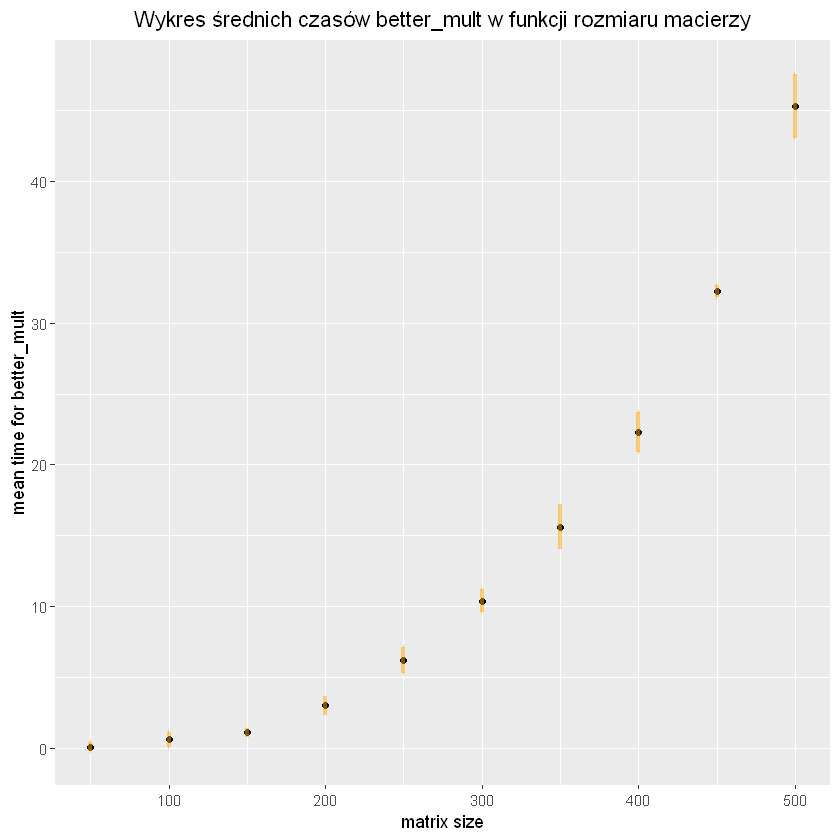

In [300]:
# Wykres średnich czasów dla better_mult
ggplot(data=size_and_better_mult, aes(x=res_grouped$size, y=res_grouped$better_mult_mean)) + geom_point() + 
geom_errorbar(aes(x=res_grouped$size, ymin=res_grouped$better_mult_mean - res_grouped$better_mult_sd, ymax=res_grouped$better_mult_mean+res_grouped$better_mult_sd),
             width=0.4, colour="orange", alpha=0.5, size=1.3) + labs(x="matrix size", y="mean time for better_mult") +
            ggtitle("Wykres średnich czasów better_mult w funkcji rozmiaru macierzy") +
            theme(plot.title=element_text(hjust=0.5))

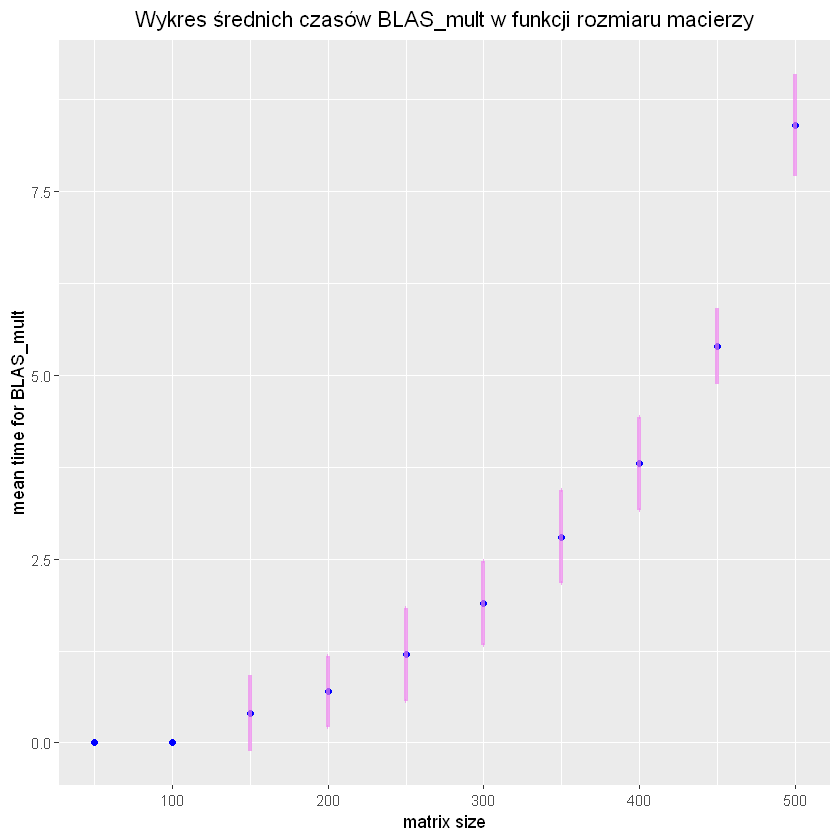

In [301]:
# Wykres średnich czasów dla BLAS_mult
ggplot(data=size_and_BLAS_mult, aes(x=res_grouped$size, y=res_grouped$BLAS_mult_mean)) + geom_point(colour="blue") + 
geom_errorbar(aes(x=res_grouped$size, ymin=res_grouped$BLAS_mult_mean - res_grouped$BLAS_mult_sd, ymax=res_grouped$BLAS_mult_mean+res_grouped$BLAS_mult_sd),
             width=0.4, colour="violet", alpha=0.7, size=1.3) + labs(x="matrix size", y="mean time for BLAS_mult") +
            ggtitle("Wykres średnich czasów BLAS_mult w funkcji rozmiaru macierzy") +
            theme(plot.title=element_text(hjust=0.5))

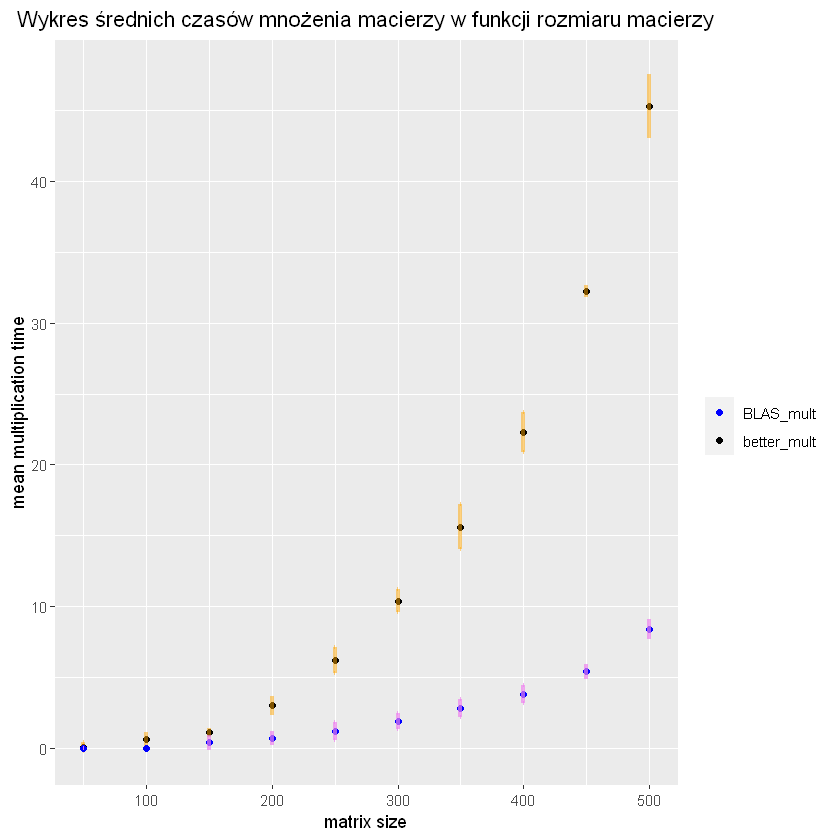

In [302]:
# Wykres wspólny dla obydwu metod mnożenia
add_points <- function(df) {
  if (identical(df,size_and_better_mult)){
      geom_point(aes(x = res_grouped$size, y = res_grouped$better_mult_mean, colour="better_mult"), data = df)
  }
    else {
        geom_point(aes(x = res_grouped$size, y = res_grouped$BLAS_mult_mean, colour="BLAS_mult"), data = df)
    }
}


add_errorbars <- function(df) {
    if (identical(df,size_and_better_mult)){
        geom_errorbar(aes(x=res_grouped$size, ymin=res_grouped$better_mult_mean - res_grouped$better_mult_sd, ymax=res_grouped$better_mult_mean+res_grouped$better_mult_sd), data=df,
    width=0.4, colour="orange", alpha=0.5, size=1.3)
    }
    else {
        geom_errorbar(aes(x=res_grouped$size, ymin=res_grouped$BLAS_mult_mean - res_grouped$BLAS_mult_sd, ymax=res_grouped$BLAS_mult_mean+res_grouped$BLAS_mult_sd), data=df,
    width=0.4, colour="violet", alpha=0.7, size=1.3)
    }
}

common_plot <- ggplot() + list(add_points(size_and_better_mult)) + list(add_errorbars(size_and_better_mult)) + 
    list(add_points(size_and_BLAS_mult)) + list(add_errorbars(size_and_BLAS_mult)) +
    labs(x="matrix size", y="mean multiplication time") +
            ggtitle("Wykres średnich czasów mnożenia macierzy w funkcji rozmiaru macierzy") +
            theme(plot.title=element_text(hjust=0.5)) +
    scale_colour_manual("", 
                      breaks = c("BLAS_mult", "better_mult"),
                      values = c("blue", "black"))

common_plot

#### Aproksymacja better_mult

In [303]:
# Generujemy ciąg punktów, który będziemy aproksymować
x=res_grouped$size
y=res_grouped$better_mult_mean
better_mult_data=data.frame(x,y)

# Fitujemy zwykłym wielomianem stopnia 3
fit1=lm(y ~ poly(x,3,raw=TRUE), data=better_mult_data)

# Generujemy listę punktów dla wyliczania wartości wielomianu aproksymującego
better_mult_app_data=data.frame(x=seq(0,500,length.out=10000))
better_mult_app_data$y=predict(fit1,better_mult_app_data)

# Wielomian aproksymujący
fit1


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = better_mult_data)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
             -7.033e-01                1.444e-02               -5.848e-05  
poly(x, 3, raw = TRUE)3  
              4.242e-07  


#### Aproksymacja BLAS_mult

In [304]:
# Generujemy ciąg punktów, który będziemy aproksymować
w=res_grouped$size
z=res_grouped$BLAS_mult_mean
BLAS_mult_data=data.frame(w,z)

# Fitujemy zwykłym wielomianem stopnia 3
fit2=lm(z ~ poly(w,3,raw=TRUE), data=BLAS_mult_data)

# Generujemy listę punktów dla wyliczania wartości wielomianu aproksymującego
BLAS_mult_app_data=data.frame(w=seq(0,500,length.out=10000))
BLAS_mult_app_data$z=predict(fit2,BLAS_mult_app_data)

# Wielomian aproksymujący
fit2


Call:
lm(formula = z ~ poly(w, 3, raw = TRUE), data = BLAS_mult_data)

Coefficients:
            (Intercept)  poly(w, 3, raw = TRUE)1  poly(w, 3, raw = TRUE)2  
             -6.900e-01                1.328e-02               -5.692e-05  
poly(w, 3, raw = TRUE)3  
              1.316e-07  


#### Wykres średnich czasów wraz z wielomianami aproksymującymi

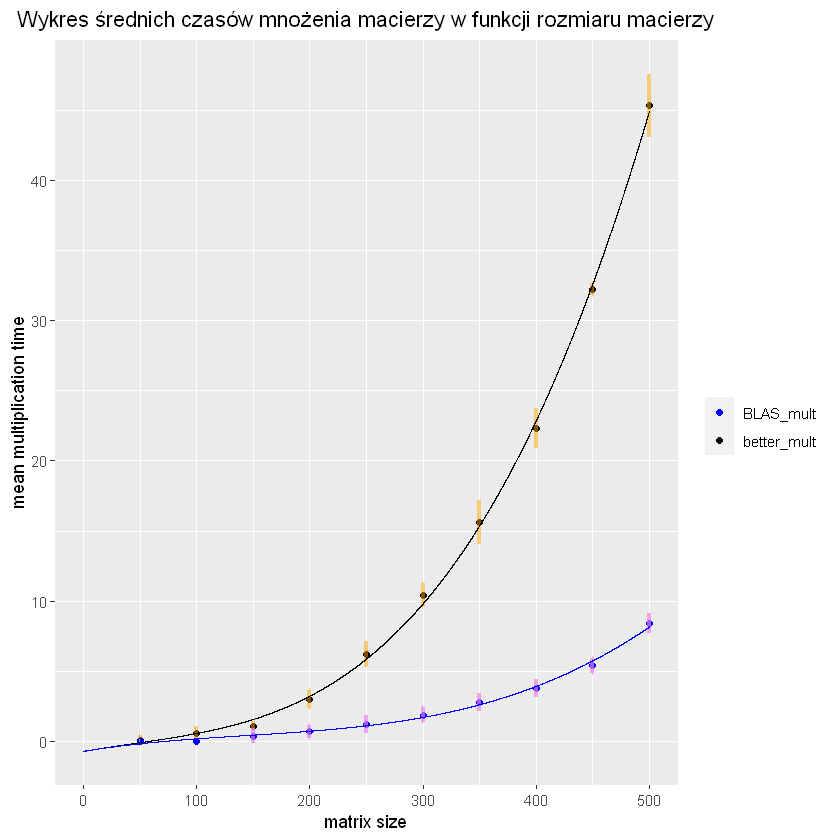

In [305]:
last_plot() + geom_line(data=better_mult_app_data, aes(x,y)) + geom_line(data=BLAS_mult_app_data, aes(w,z), colour="blue")

## Zadanie 6

Dopasowanie krzywej wykładniczej do liczby wykrytych zakażeń koronawirusem. Wykorzystane dane pochodzą z:
https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview#.

In [18]:
# googlecheets4, tidyverse
sheets_deauth()
covid_Poland=read_sheet("https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview#", range="A:G")

Reading from "COVID-19 prognoza"
Range "A:G"
New names:
* `` -> ...1
* `` -> ...4
* `prognoza z ostatnich 7 dni [R2 = 0.9736]` -> `prognoza z ostatnich 7 dni [R2 = 0.9736]...5`
* `prognoza z ostatnich 7 dni [R2 = 0.9736]` -> `prognoza z ostatnich 7 dni [R2 = 0.9736]...6`


In [32]:
# Data extraction and filtering
covid_Poland=covid_Poland %>% filter(!is.na(przyrost))

covid_Poland=covid_Poland[c(1,2,3,7)]

names(covid_Poland)[1] <- "Date"
names(covid_Poland)[2] <- "Day"
names(covid_Poland)[3] <- "Reported_all"
names(covid_Poland)[4] <- "Reported_delta"

covid_Poland

Date,Day,Reported_all,Reported_delta
2020-03-05,1,1,0
2020-03-06,2,5,4
2020-03-07,3,6,1
2020-03-08,4,11,5
2020-03-09,5,17,6
2020-03-10,6,22,5
2020-03-11,7,31,9
2020-03-12,8,51,20
2020-03-13,9,68,17
2020-03-14,10,104,36


### Aproksymacja w czasie od początku roku (01.01.2021 - 13.04.2021)

In [38]:
# How many days in this time interval
as.Date("2021-04-13")-as.Date("2021-01-01")

Time difference of 102 days

In [44]:
# Generuję ciąg punktów, który będę aproksymować - ciąg 102 dni
covid_Poland_t102=tail(covid_Poland,102)

# Dopasowanie modelu
covid_Poland_t102_log=lm(log(Reported_delta) ~ Day, data=covid_Poland_t102)

# Generuję listę punktów dla wyliczenia wartości funkcji aproksymującej
generated_time=data.frame(Day=seq(302,405,by=0.01))
generated_time$Reported_delta=exp(predict(covid_Poland_t102_log, generated_time))

In [129]:
# Summary model info
summary(covid_Poland_t102_log)


Call:
lm(formula = log(Reported_delta) ~ Day, data = covid_Poland_t102)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26987 -0.28308  0.04324  0.31960  1.10601 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.373821   0.577448   5.843 6.44e-08 ***
Day         0.016486   0.001623  10.156  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4827 on 100 degrees of freedom
Multiple R-squared:  0.5077,	Adjusted R-squared:  0.5028 
F-statistic: 103.1 on 1 and 100 DF,  p-value: < 2.2e-16


##### Współczynnik R-kwadrat, świadczący o jakości dopasowania modelu, wyniósł ~ 51%.

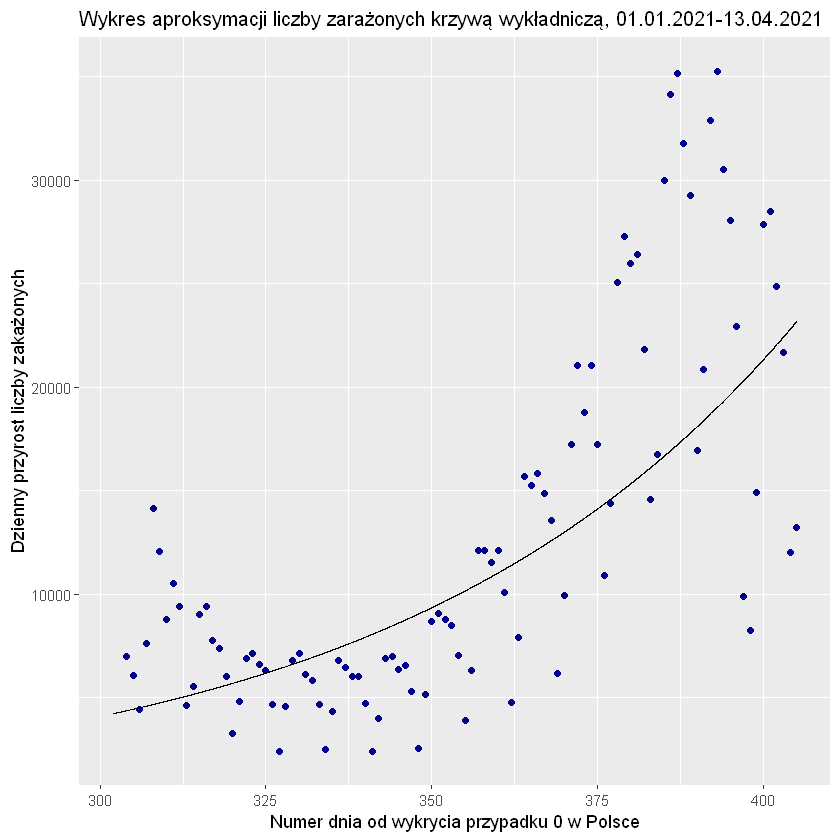

In [130]:
# Plot
ggplot(covid_Poland_t102, aes(Day, Reported_delta)) + geom_point(colour="darkblue") +
    geom_line(data=generated_time, aes(Day, Reported_delta)) + xlab("Numer dnia od wykrycia przypadku 0 w Polsce") + ylab("Dzienny przyrost liczby zakażonych") +
ggtitle("Wykres aproksymacji liczby zarażonych krzywą wykładniczą, 01.01.2021-13.04.2021") +
    theme(plot.title=element_text(size=12))

### Aproksymacja w czasie ostatniego miesiąca (13.03.2021 - 13.04.2021)

In [55]:
# How many days in this time interval
as.Date("2021-04-13")-as.Date("2021-03-13")

Time difference of 31 days

In [58]:
# Generuję ciąg punktów, który będę aproksymować - ciąg 31 dni
covid_Poland_t31=tail(covid_Poland,31)

# Dopasowanie modelu
covid_Poland_t31_log=lm(log(Reported_delta) ~ Day, data=covid_Poland_t31)

# Generuję listę punktów dla wyliczenia wartości funkcji aproksymującej
generated_time_2=data.frame(Day=seq(375,405,by=0.01))
generated_time_2$Reported_delta=exp(predict(covid_Poland_t31_log, generated_time_2))

In [128]:
# Summary model info
summary(covid_Poland_t31_log)


Call:
lm(formula = log(Reported_delta) ~ Day, data = covid_Poland_t31)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9137 -0.2969  0.1090  0.3166  0.5170 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 11.695320   3.214008   3.639  0.00106 **
Day         -0.004433   0.008239  -0.538  0.59465   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4103 on 29 degrees of freedom
Multiple R-squared:  0.009884,	Adjusted R-squared:  -0.02426 
F-statistic: 0.2895 on 1 and 29 DF,  p-value: 0.5947


##### Współczynnik R-kwadrat wyniósł niespełna 1%. Świadczy to o bardzo złym dopasowaniu modelu. Danych z okresu 13.03.2021-13.04.2021 nie należy zatem aproksymować funkcją wykładniczą.

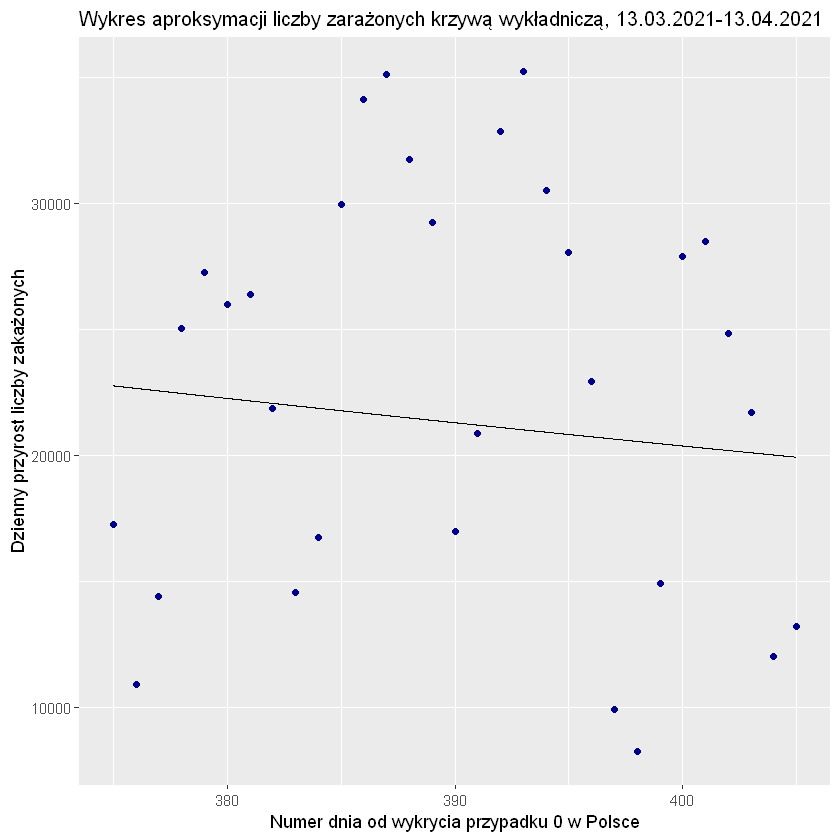

In [131]:
# Plot
ggplot(covid_Poland_t31, aes(Day, Reported_delta)) + geom_point(colour="darkblue") + 
    geom_line(data=generated_time_2, aes(Day, Reported_delta)) + xlab("Numer dnia od wykrycia przypadku 0 w Polsce") + ylab("Dzienny przyrost liczby zakażonych") +
ggtitle("Wykres aproksymacji liczby zarażonych krzywą wykładniczą, 13.03.2021-13.04.2021") +
    theme(plot.title=element_text(size=12))

### Aproksymacja w czasie 01.07.2020 - 01.08.2020

In [62]:
# How many days in this time interval
as.Date("2020-08-01")-as.Date("2020-07-01")

Time difference of 31 days

In [95]:
# Defining July_2020 time interval
july_2020=interval(ymd("2020-07-01"), ymd("2020-08-01"))

# Selecting data within given time interval
days=covid_Poland$Day[ymd(covid_Poland$Date) %within% july_2020]
reported_deltas=covid_Poland$Reported_delta[ymd(covid_Poland$Date) %within% july_2020]

# New data frame containing selected data
covid_Poland_July_2020=data.frame(days,reported_deltas)
names(covid_Poland_July_2020)[1] <- "Day"
names(covid_Poland_July_2020)[2] <- "Reported_delta"

In [96]:
# Dopasowanie modelu
covid_Poland_July_2020_log=lm(log(Reported_delta) ~ Day, data=covid_Poland_July_2020)

# Generuję listę punktów dla wyliczenia wartości funkcji aproksymującej
generated_time_3=data.frame(Day=seq(119,150,by=0.01))
generated_time_3$Reported_delta=exp(predict(covid_Poland_July_2020_log, generated_time_3))

In [127]:
summary(covid_Poland_July_2020_log)


Call:
lm(formula = log(Reported_delta) ~ Day, data = covid_Poland_July_2020)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33312 -0.09407 -0.02267  0.08363  0.46692 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.435677   0.512018   4.757 4.62e-05 ***
Day         0.025570   0.003798   6.733 1.84e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1984 on 30 degrees of freedom
Multiple R-squared:  0.6017,	Adjusted R-squared:  0.5885 
F-statistic: 45.33 on 1 and 30 DF,  p-value: 1.836e-07


##### Obserwujemy współczynnik R-kwadrat na poziomie 60%. Jest to najwyższa wartość R-kwadrat spośród dopasowywanych w tym zadaniu modelów.

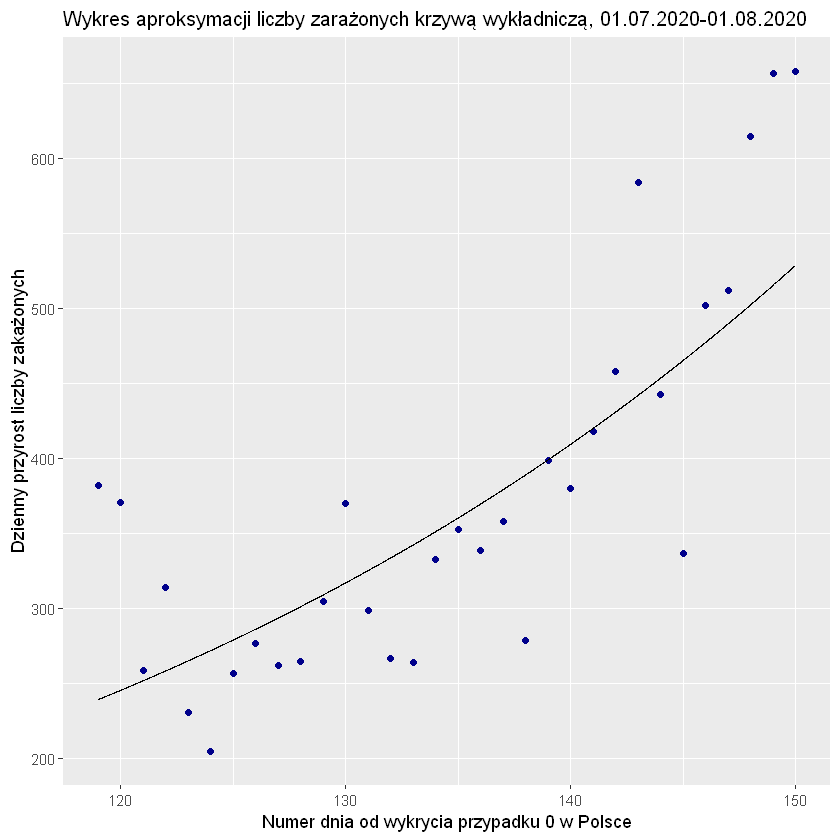

In [132]:
# Plot
ggplot(covid_Poland_July_2020, aes(Day, Reported_delta)) + geom_point(colour="darkblue") +
    geom_line(data=generated_time_3, aes(Day, Reported_delta)) + xlab("Numer dnia od wykrycia przypadku 0 w Polsce") + ylab("Dzienny przyrost liczby zakażonych") +
ggtitle("Wykres aproksymacji liczby zarażonych krzywą wykładniczą, 01.07.2020-01.08.2020") +
    theme(plot.title=element_text(size=12))

Treści zadań:

Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:
1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch   różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)) (1p.)
2. Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych  parametrów (dla każdego takiego zestawu)
3. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) (1p.)
4. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 (1p.)
5. Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu. (1p.)
6. Dopasować krzywą wykładniczą do liczby zakażonych koronawirusem. Przykładowe źródło danych w GoogleDoc lub https://ourworldindata.org/explorers/coronavirus-data-explorer. Jak zmieniają się krzywe w zależności od wybranego okresu czasu. Porównać na wykresach co najmniej 2 dopasowania (2p.)